# Academic Performance Analysis

### Overview:

In this analysis, I pulled data from my personal degree planner Excel sheet, containing information on courses, grades, and credit hours across multiple terms. The objective was to gain insights into my academic performance by calculating a difficulty score for each term and visualizing it alongside the GPA for each term.

### Steps:

1. **Data Extraction:**
   - The initial data included details such as the course name, grade, credit hours, quality points (grade $*$ credit hours), and term.

2. **Data Preparation:**
   - I organized the data by term, creating a structured DataFrame with relevant information.

3. **Difficulty Score Calculation:**
   - A difficulty score was calculated for each course by multiplying the numeric part of the course code with the credit hours. This score was intended to provide a measure of the overall challenge posed by each course. For reference, 100-199 course codes are typically assigned to freshman level courses, 200-299 for sophomore, and so on.

4. **Normalization:**
   - The difficulty scores were normalized to a scale of 0 to 4 to facilitate easier comparison across terms and to each GPA.

5. **Visualization:**
   - The GPA and normalized difficulty scores were plotted over each term, providing a visual representation of academic performance relative to the difficulty of the term.
  
### Notes

- While contemplating this analysis, I briefly considered incorporating a measure of material difficulty for each course. However, I hesitated due to the challenge of recalling the difficulty levels of specific classes from several years ago without introducing potential biases into the results.

- Another aspect I pondered was the inclusion of a binary variable indicating whether I was working part-time while in school. Despite its potential relevance, I opted against it to maintain a focused analysis solely on academics. Additionally, obtaining reliable data on the exact number of weekly hours worked in my previous part-time job proved challenging.

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# GPA and course data
overall_gpa = 3.367320

data = [
    # Fall 2020
    ["Fall 2020", "BA 100", 4, 1, 4],
    ["Fall 2020", "BA 131", 3, 4, 12],
    ["Fall 2020", "MTH 243", 4, 4, 16],
    ["Fall 2020", "USEM 101", 4, 4, 16],
    # Winter 2021
    ["Winter 2021", "CW 202", 4, 4, 16],
    ["Winter 2021", "ENG 104", 3.7, 4, 14.8],
    ["Winter 2021", "PHL 205", 4, 4, 16],
    ["Winter 2021", "USEM 102", 3.7, 4, 14.8],
    # Spring 2021
    ["Spring 2021", "EC 201", 3.3, 4, 13.2],
    ["Spring 2021", "MTH 105", 4, 4, 16],
    ["Spring 2021", "PHL 201", 4, 4, 16],
    ["Spring 2021", "USEM 103", 3.3, 4, 13.2],
    # Fall 2021
    ["Fall 2021", "CIS 110", 4, 4, 16],
    ["Fall 2021", "ERTH 101", 3.7, 4, 14.8],
    ["Fall 2021", "MATH 111", 4, 4, 16],
    # Winter 2022
    ["Winter 2022", "CLASS 110", 4, 4, 16],
    ["Winter 2022", "DSCI 101", 2.3, 4, 9.2],
    ["Winter 2022", "ERTH 202", 4, 4, 16],
    ["Winter 2022", "MATH 112", 3.3, 4, 13.2],
    # Spring 2022
    ["Spring 2022", "DSCI 102", 3.7, 4, 14.8],
    ["Spring 2022", "HIST 105", 3.7, 4, 14.8],
    ["Spring 2022", "MATH 251", 2.7, 4, 10.8],
    ["Spring 2022", "MUS 265", 4.3, 4, 17.2],
    # Fall 2022
    ["Fall 2022", "CS 210", 1.7, 4, 6.8],
    ["Fall 2022", "MATH 341", 2.3, 4, 9.2],
    ["Fall 2022", "EC 311", 3, 4, 12],
    ["Fall 2022", "EC 320", 2.7, 4, 10.8],
    # Winter 2023
    ["Winter 2023", "EC 421", 3, 4, 12],
    ["Winter 2023", "MATH 253", 1, 4, 4],
    ["Winter 2023", "MATH 342", 1.7, 4, 6.8],
    # Spring 2023
    ["Spring 2023", "CS 211", 2.7, 4, 10.8],
    ["Spring 2023", "MATH 307", 4, 4, 16],
    ["Spring 2023", "EC 434", 3.7, 4, 14.8],
    # Fall 2023
    ["Fall 2023", "CS 212", 2.3, 4, 9.2],
    ["Fall 2023", "DSCI 311", 3.7, 4, 14.8],
    ["Fall 2023", "DSCI 345", 4.3, 4, 17.2],
    ["Fall 2023", "PSY 401", "-", 1, "-"],
    # Winter 2024
    ["Winter 2024", "DSCI 372", 3.7, 4, 14.8],
    ["Winter 2024", "GEOG 142", 4.3, 4, 17.2],
    ["Winter 2024", "MATH 461", 3, 4, 12],
    ["Winter 2024", "PHIL 223", 3.3, 4, 13.2],
]

columns = ["Term", "Course", "Grade", "Hours", "Quality Points"]

gpa = pd.DataFrame(data, columns=columns)
gpa.head()

,Term,Course,Grade,Hours,Quality Points
0,Fall 2020,BA 100,4,1,4
1,Fall 2020,BA 131,3,4,12
2,Fall 2020,MTH 243,4,4,16
3,Fall 2020,USEM 101,4,4,16
4,Winter 2021,CW 202,4,4,16


In [3]:
# extract the first number from the "Course" column
gpa['Course Number'] = gpa['Course'].str.extract('(\d+)')

# convert the extracted numbers to numeric values
gpa['Course Number'] = pd.to_numeric(gpa['Course Number'], errors='coerce')

# create the "Difficulty" column by multiplying "Course Number" and "Hours"
gpa['Difficulty'] = gpa['Course Number'] * gpa['Hours']

# drop the temporary "Course Number" column
gpa = gpa.drop(columns=['Course Number'])
gpa.head()

,Term,Course,Grade,Hours,Quality Points,Difficulty
0,Fall 2020,BA 100,4,1,4,100
1,Fall 2020,BA 131,3,4,12,524
2,Fall 2020,MTH 243,4,4,16,972
3,Fall 2020,USEM 101,4,4,16,404
4,Winter 2021,CW 202,4,4,16,808


In [4]:
# create a new DataFrame "terms"
terms = pd.DataFrame()

# extract unique terms from the "Term" column
unique_terms = gpa['Term'].unique()

# initialize lists to store values for the "terms" DataFrame
term_names = []
term_difficulty_sum = []
term_gpa = []

# iterate over unique terms and calculate sum of difficulty scores and GPA for each term
for term in unique_terms:
    term_data = gpa[gpa['Term'] == term].copy()  # Create a copy to avoid SettingWithCopyWarning
    
    # calculate sum of difficulty scores for the term
    sum_difficulty = term_data['Difficulty'].sum()
    
    # convert "Quality Points" to numeric, ignoring errors and excluding rows with missing values
    term_data['Quality Points'] = pd.to_numeric(term_data['Quality Points'], errors='coerce')
    term_data = term_data.dropna(subset=['Quality Points'])
    
    # check if there are valid rows for calculations
    if not term_data.empty:
        # calculate term GPA (total quality points divided by total hours)
        term_quality_points = term_data['Quality Points'].sum()
        term_hours = term_data['Hours'].sum()
        term_gpa_value = term_quality_points / term_hours if term_hours != 0 else 0

        # append values to the lists
        term_names.append(term)
        term_difficulty_sum.append(sum_difficulty)
        term_gpa.append(term_gpa_value)

# add lists as columns to the "terms" DataFrame
terms['Term'] = term_names
terms['Difficulty Sum'] = term_difficulty_sum
terms['GPA'] = term_gpa

# normalize the "Difficulty" column to have a max of 10
max_difficulty = terms['Difficulty Sum'].max()
terms['Difficulty'] = (terms['Difficulty Sum'] / max_difficulty) * 4

# drop the original "Difficulty" column
terms = terms.drop(columns=['Difficulty Sum'])
terms

,Term,GPA,Difficulty
0,Fall 2020,3.692308,1.669449
1,Winter 2021,3.850000,2.046745
2,Spring 2021,3.650000,2.036728
3,Fall 2021,3.900000,1.075125
4,Winter 2022,3.400000,1.752922
5,Spring 2022,3.600000,2.414023
6,Fall 2022,2.425000,3.946578
7,Winter 2023,1.900000,3.392321
8,Spring 2023,3.466667,3.178631
9,Fall 2023,3.433333,3.232888


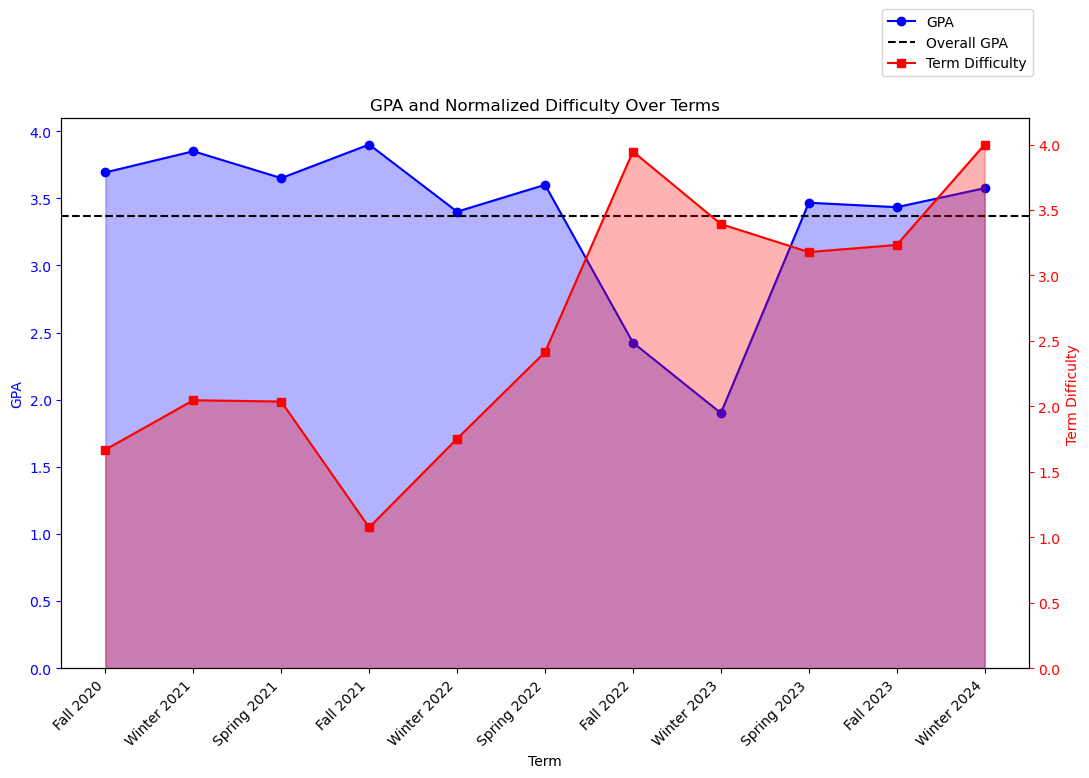

In [5]:
# set the "Term" column as the index
terms.set_index('Term', inplace=True)

# plot the stacked area plot
fig, ax1 = plt.subplots(figsize=(11, 7))

# plot GPA on the left y-axis with translucent area
ax1.plot(terms.index, terms['GPA'], label='GPA', color='blue', marker='o')
ax1.fill_between(terms.index, 0, terms['GPA'], color='blue', alpha=0.3)  # translucent area
ax1.axhline(y=overall_gpa, color='black', linestyle='--', label='Overall GPA')

# set labels and title
ax1.set_xlabel('Term')
ax1.set_ylabel('GPA', color='blue')
ax1.tick_params('y', colors='blue')

# angle the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# create a secondary y-axis for normalized difficulty
ax2 = ax1.twinx()
ax2.plot(terms.index, terms['Difficulty'], label='Term Difficulty', color='red', marker='s')
ax2.fill_between(terms.index, 0, terms['Difficulty'], color='red', alpha=0.3)  # translucent area
ax2.set_ylabel('Term Difficulty', color='red')
ax2.tick_params('y', colors='red')

# set shared y-axis limits for both plots
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# set title and legend
plt.title('GPA and Normalized Difficulty Over Terms')
fig.tight_layout()
fig.legend(loc='lower left', bbox_to_anchor=(0.8, 1))

# show the plot
plt.show()

### Results

- The first three terms (Fall 2020, Winter 2021, and Spring 2021) correspond to the period when I pursued Business Administration at Southern Oregon University. Throughout these terms, I maintained a consistently high GPA, reflecting a strong academic foundation in this field.

- Fall 2021 marks a pivotal moment as I transitioned to the University of Oregon to pursue Data Science. Despite the shift, this term stands out with a high GPA and a remarkably low difficulty score, reflecting an easy transition to a new academic environment.

- Winter 2022 sees a slight dip in GPA, accompanied by a moderate increase in difficulty. This adjustment period signified the challenges associated with adapting to a new academic program.

- Spring 2022 showcases a balanced performance, with both GPA and difficulty exhibiting moderate values, suggesting a period of stabilization and acclimatization to the Data Science curriculum.

- Fall 2022 marks a notable shift, featuring a lower GPA and a significant spike in difficulty. This term may represent a more intense academic landscape and the incorporation of more challenging courses within the Data Science program.

- Winter 2023 reflects a dip in both GPA and difficulty, indicating a period of adjustment and unique challenges specific to this term.

- Spring 2023 shows a rebound in both GPA and difficulty, demonstrating resilience and a return to a balanced academic performance within the Data Science program.

- Fall 2023 maintains a solid GPA, with a complexity level comparable to the preceding term. This stability suggests a continued adaptation to the demands of the Data Science curriculum.
- Winter 2024 showcases a strong improvement, with a notable increase in GPA despite a high difficulty score, underscoring my dedication and perseverance in mastering the intricacies of the Data Science field.